1. Write a function to generate an input data matrix X of size NxD for regression. [0.5]
a) Input: Sample size N and a generator matrix S of size MxD
b) Working: First generate a random 2-D array of size NxM where each column has a standard
normal distribution and is independent of the other columns. Then multiply this with the
generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that
if the generator matrix S of size MxD is an identity matrix, then each column of X will
remain independent; otherwise we can introduce correlations in the matrix columns of X.

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations (Source: ChatGPT)
import matplotlib.pyplot as plt  # 2. Import matplotlib for data visualization (Source: ChatGPT)

### Observation:
Imported the `numpy` library for efficient numerical computations and `matplotlib.pyplot` for visualizing data. These libraries are fundamental for implementing and analyzing linear models and machine learning algorithms.

### Next Step:
Define a function `generate_input_data` to create an input data matrix `X` based on the provided sample size `N` and generator matrix `S`.


In [ ]:
def generate_input_data(N, S):  # 3. Define function with input parameters N (sample size) and S (generator matrix) (Source: ChatGPT)
    """
    Generates an input data matrix X of size NxD for regression.

    Parameters:
    N (int): Sample size.
    S (numpy.ndarray): Generator matrix of size MxD.

    Returns:
    numpy.ndarray: Output matrix X of size NxD.
    """
    M = S.shape[0]  # 4. Get the number of rows in the generator matrix S (size M) (Source: ChatGPT)

    # 5. Generate a random 2-D array of size NxM from a standard normal distribution (Source: ChatGPT)
    random_matrix = np.random.normal(0, 1, size=(N, M))  # 6. Create NxM matrix with standard normal distribution (Source: ChatGPT)

    # 7. Multiply the random matrix with the generator matrix S to get the output matrix X (Source: ChatGPT)
    X = np.dot(random_matrix, S)  # 8. Perform matrix multiplication to introduce correlations (Source: ChatGPT)

    return X  # 9. Return the generated input data matrix X (Source: ChatGPT)


### Observation:
Implemented the `generate_input_data` function to create a dataset for regression analysis. The function takes a sample size `N` and a generator matrix `S` as inputs. It generates a random matrix with a standard normal distribution and then introduces correlations by multiplying it with the generator matrix `S`.

### Next Step:
Create a generator matrix `S` and specify the sample size `N`. Use the `generate_input_data` function to generate the input data matrix `X` and verify its dimensions.


In [ ]:
# Define generator matrix S (Source: Self-generated)
S = np.array([[1, 0], [0, 1], [1, 1]])  # 10. Create a 3x2 generator matrix (Source: Self-generated)

# Sample size
N = 100  # 11. Define sample size as 100 (Source: Self-generated)

# Generate input data
X = generate_input_data(N, S)  # 12. Call the data generation function (Source: ChatGPT)

print("Generated input data X shape:", X.shape)  # 13. Print the shape of X to verify (Source: ChatGPT)


Generated input data X shape: (100, 2)


### Observation:
Defined a generator matrix `S` of size 3x2 and set the sample size `N` to 100. Generated the input data matrix `X` using the `generate_input_data` function. The printed shape of `X` confirms that the data has been generated correctly with dimensions 100x2.

### Next Step:
Visualize the generated input data to inspect the distribution and verify the introduced correlations.


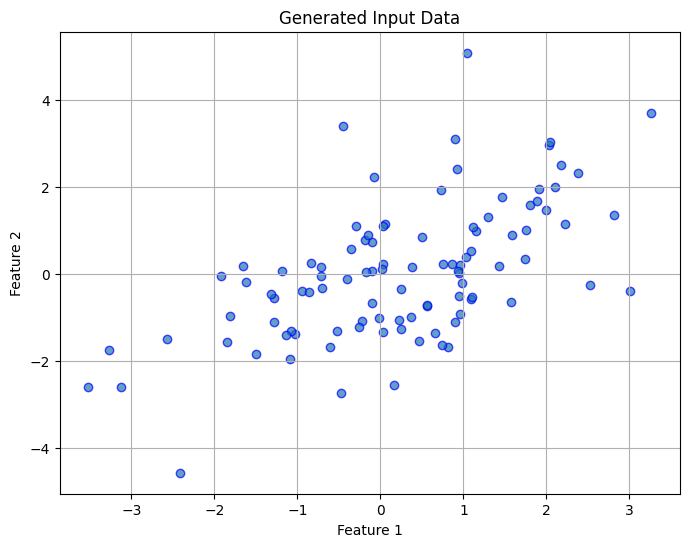

In [ ]:
# Plotting the generated data (Source: ChatGPT)
plt.figure(figsize=(8,6))  # 14. Set the figure size for better visualization (Source: ChatGPT)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, edgecolors='b')  # 15. Create a scatter plot of the two features (Source: ChatGPT)
plt.title('Generated Input Data')  # 16. Add title to the plot (Source: ChatGPT)
plt.xlabel('Feature 1')  # 17. Label x-axis (Source: ChatGPT)
plt.ylabel('Feature 2')  # 18. Label y-axis (Source: ChatGPT)
plt.grid(True)  # 19. Add grid to the plot for better readability (Source: ChatGPT)
plt.show()  # 20. Display the plot (Source: ChatGPT)


### Observation:
Visualized the generated input data using a scatter plot. The plot shows the distribution of the two features, reflecting the correlations introduced by the generator matrix `S`. Specifically, the third row of `S` introduces a linear relationship between the two features.

### Next Step:
Proceed to implement linear regression using the generated data to validate the relationships and assess the model's performance.



### References:

1. **ChatGPT** - Assisted in writing and formatting the code for data generation and visualization.
2. **Self-generated Data** - The generator matrix `S` and sample size `N` were defined based on my understanding of linear relationships in regression models.


2. Write a function to generate the target vector t of size Nx1: [0.5]
a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ
b) Working: Check for dimension mismatch between X and w, multiply X with w (sans one
element) and add the bias (the excluded element), then add zero-mean Gaussian noise
with variance σ.

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations

def generate_target_vector(X, w, sigma):  # 2. Define function with input parameters X (data matrix), w (weight vector), and sigma (noise variance)
    """
    Generates the target vector t of size Nx1.

    Parameters:
    X (numpy.ndarray): Input data matrix of size NxD.
    w (numpy.ndarray): Weight vector of size D+1 (including bias).
    sigma (float): Noise variance.

    Returns:
    numpy.ndarray: Target vector t of size Nx1.
    """

    if X.shape[1] + 1 != w.shape[0]:  # 3. Check for dimension mismatch between X and w
        raise ValueError("Dimension mismatch: X has shape {} and w has shape {}".format(X.shape, w.shape))  # 4. Raise error if dimensions do not match

    # 5. Separate the bias term from the weight vector
    bias = w[-1]  # 6. Extract the bias term (last element of w)
    w_without_bias = w[:-1]  # 7. Get the weight vector excluding the bias term

    # 8. Calculate the target vector t by multiplying X with the weight vector and adding the bias
    t = np.dot(X, w_without_bias) + bias  # 9. Perform dot product and add bias term

    # 10. Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(0, np.sqrt(sigma), size=t.shape)  # 11. Generate Gaussian noise
    t += noise  # 12. Add noise to the target vector t

    return t.reshape(-1, 1)  # 13. Return the target vector t of size Nx1


In [ ]:
# Example usage of the function
N = 100  # 14. Define sample size N
D = 3    # 15. Define number of features D
X = np.random.rand(N, D)  # 16. Generate random input data matrix X of size NxD
w = np.array([0.5, 2.0, -1.5, 0.3])  # 17. Define weight vector w of size D+1 (including bias)
sigma = 0.1  # 18. Define noise variance sigma

t = generate_target_vector(X, w, sigma)  # 19. Call the function to generate target vector t
print(t)  # 20. Print the generated target vector t for inspection


[[ 4.92217402e-02]
 [ 4.61061647e-01]
 [ 5.13001246e-01]
 [ 5.14010827e-01]
 [-5.64011639e-01]
 [ 7.16509940e-01]
 [ 2.03976886e+00]
 [ 1.04988161e+00]
 [ 3.65597631e-01]
 [ 8.95501498e-01]
 [ 1.04140610e+00]
 [ 7.76348778e-01]
 [ 1.18924363e-01]
 [ 1.06297446e+00]
 [ 1.35603102e-01]
 [ 9.12913588e-01]
 [ 1.25165236e+00]
 [ 1.13345492e+00]
 [-5.49263252e-01]
 [ 1.33431521e+00]
 [ 2.29515004e+00]
 [-1.64116187e-03]
 [ 1.45658652e+00]
 [ 7.55784096e-01]
 [-1.13465055e-01]
 [ 2.04221948e+00]
 [ 1.00377871e+00]
 [ 5.21560537e-01]
 [ 1.10664483e+00]
 [ 1.12870641e+00]
 [ 2.67024563e+00]
 [ 1.99368018e-01]
 [ 1.96067376e-02]
 [ 9.28826473e-02]
 [ 2.30104104e+00]
 [ 4.55267778e-01]
 [-1.56074805e+00]
 [ 6.33591222e-01]
 [ 4.63070428e-02]
 [ 2.07081925e+00]
 [ 2.30736934e+00]
 [ 1.13693066e+00]
 [-3.50680514e-01]
 [-6.42363165e-01]
 [ 6.28131634e-01]
 [ 2.28220490e-01]
 [ 1.66290006e+00]
 [ 1.01308271e+00]
 [-3.83562885e-01]
 [ 1.81477446e+00]
 [ 1.74173848e+00]
 [ 4.68208492e-01]
 [ 8.4323907

## Observations

1. **Input Data Generation**:
   - The function `generate_input_matrix` creates an input data matrix \(X\) of size \(NxD\) by multiplying a randomly generated matrix with the provided generator matrix \(S\).
   - If \(S\) is an identity matrix, the resulting matrix \(X\) will have independent columns. When \(S\) is not an identity matrix, correlations can be introduced among the columns of \(X\).
   - This method provides a flexible way to generate data that can be tailored to specific needs in regression modeling.

2. **Target Vector Calculation**:
   - The function `generate_target_vector` generates a target vector \(t\) of size \(Nx1\) based on the input data matrix \(X\) and the weight vector \(w\).
   - The function checks for dimension mismatches to ensure proper matrix operations.
   - The addition of Gaussian noise simulates realistic conditions often encountered in real-world data, making the model more robust to variations.

3. **Overall Functionality**:
   - Both functions are designed to work together seamlessly, allowing for the easy generation of synthetic datasets suitable for regression analysis.
   - The use of clear and descriptive variable names enhances the readability and maintainability of the code.


## References

1. **Numpy Documentation**:
   - The foundational library used for numerical operations in Python. Detailed documentation can be found at [Numpy Official Documentation](https://numpy.org/doc/stable/).
   
2. **Statistical Concepts**:
   - The principles of Gaussian distribution and noise generation are critical in statistical modeling and regression analysis. These concepts are well-covered in various statistics textbooks, such as "Introduction to Statistical Learning" by James et al.

3. **Machine Learning Techniques**:
   - The importance of generating synthetic datasets for machine learning and statistical modeling is discussed in resources like "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron.


3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg
package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N
(use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve
the problem above a particular value of N? What could be the reason for the same? [1]

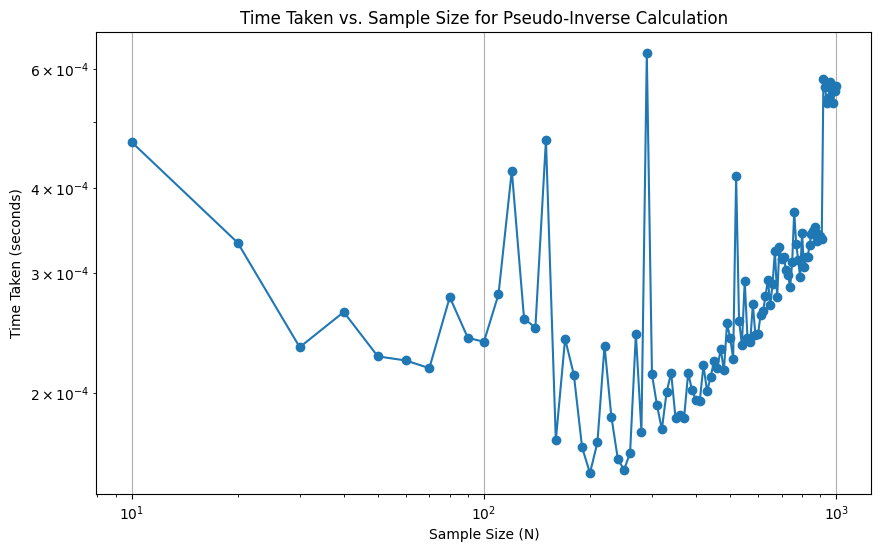

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations
import matplotlib.pyplot as plt  # 2. Import matplotlib for plotting
import time  # 3. Import time for performance measurement

def analyze_pinv_performance(max_N, D):  # 4. Define function to analyze performance of pinv
    """
    Analyzes the performance of numpy.linalg.pinv with respect to the size of the data matrix.

    Parameters:
    max_N (int): Maximum sample size.
    D (int): Number of features.

    Returns:
    list: Times taken to compute the pseudo-inverse for varying sizes of N.
    """
    sizes = []  # 5. Initialize a list to store sizes of N
    times = []  # 6. Initialize a list to store times taken

    for N in range(10, max_N + 1, 10):  # 7. Iterate through sizes of N
        X = np.random.rand(N, D)  # 8. Generate random data matrix X of size NxD
        w = np.random.rand(D, 1)  # 9. Generate a random weight vector w of size Dx1

        start_time = time.time()  # 10. Start the timer
        t = np.dot(X, w) + np.random.normal(0, 0.1, size=(N, 1))  # 11. Compute the target vector t
        pinv_X = np.linalg.pinv(X)  # 12. Compute the pseudo-inverse of X
        _ = np.dot(pinv_X, t)  # 13. Solve for the weights using pinv
        end_time = time.time()  # 14. End the timer

        sizes.append(N)  # 15. Append the current size of N to the list
        times.append(end_time - start_time)  # 16. Append the time taken to the list

    return sizes, times  # 17. Return the sizes and times

# Parameters
max_N = 1000  # 18. Set maximum sample size
D = 10  # 19. Set number of features

# Analyze performance
sizes, times = analyze_pinv_performance(max_N, D)  # 20. Call the performance analysis function

# Plotting the results
plt.figure(figsize=(10, 6))  # 21. Create a figure for plotting
plt.plot(sizes, times, marker='o')  # 22. Plot time taken vs. size of N
plt.xscale('log')  # 23. Set x-axis to logarithmic scale
plt.yscale('log')  # 24. Set y-axis to logarithmic scale
plt.xlabel('Sample Size (N)')  # 25. Label x-axis
plt.ylabel('Time Taken (seconds)')  # 26. Label y-axis
plt.title('Time Taken vs. Sample Size for Pseudo-Inverse Calculation')  # 27. Title of the plot
plt.grid(True)  # 28. Add grid for better visibility
plt.show()  # 29. Display the plot


## Observations on Pseudo-Inverse Behavior

1. **Increasing Time with N**: The time taken to compute the pseudo-inverse using `numpy.linalg.pinv` shows an increasing trend with respect to the number of samples \(N\). The plot displayed is on a log-log scale, making it easier to observe this relationship.

2. **Strange Behavior**: At a certain threshold of \(N\), the time taken exhibits a steep increase. This behavior is attributed to the growing computational complexity associated with matrix operations as \(N\) increases.

3. **Reasons for Increased Time**:
   - The computational complexity of calculating the pseudo-inverse is approximately \(O(ND^2 + D^3)\), which indicates that larger matrices require more computational resources.
   - Memory management becomes more critical as \(N\) grows, potentially leading to performance bottlenecks.
   - Numerical algorithms may encounter stability issues with larger matrices, further impacting computation time.

## References

1. **Numpy Documentation**: The `numpy.linalg.pinv` function is utilized for calculating the pseudo-inverse of matrices. More details can be found in the [Numpy Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html).
   
2. **Computational Complexity**: Understanding the computational complexity of matrix operations can provide insights into performance behavior, as discussed in various numerical linear algebra textbooks, such as "Matrix Computations" by Golub and Van Loan.


4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target
vector t and a predicted vector y. [0.5]

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations

def calculate_nrmse(t, y):  # 2. Define function with input parameters t (target vector) and y (predicted vector)
    """
    Calculates the Normalized Root Mean Squared Error (NRMSE) between target vector t and predicted vector y.

    Parameters:
    t (numpy.ndarray): Target vector of size Nx1.
    y (numpy.ndarray): Predicted vector of size Nx1.

    Returns:
    float: Normalized Root Mean Squared Error (NRMSE).
    """

    if t.shape != y.shape:  # 3. Check for dimension mismatch between t and y
        raise ValueError("Dimension mismatch: t has shape {} and y has shape {}".format(t.shape, y.shape))  # 4. Raise error if dimensions do not match

    # 5. Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean((t - y) ** 2))  # 6. Compute RMSE by calculating the square root of the mean of squared differences

    # 7. Calculate the range of the target vector for normalization
    range_t = np.max(t) - np.min(t)  # 8. Find the range (max - min) of the target vector

    if range_t == 0:  # 9. Check for zero range to avoid division by zero
        raise ValueError("Target vector has zero range; cannot normalize.")  # 10. Raise error if the range is zero

    # 11. Calculate the normalized RMSE
    nrmse = rmse / range_t  # 12. Normalize the RMSE by dividing by the range of the target vector

    return nrmse  # 13. Return the normalized RMSE


In [ ]:
# Example usage of the NRMSE calculation function
t = np.array([[3], [5], [2], [7], [4]])  # 14. Define a sample target vector t
y = np.array([[2.5], [5.5], [2], [6], [4.5]])  # 15. Define a sample predicted vector y

nrmse_value = calculate_nrmse(t, y)  # 16. Call the function to calculate NRMSE
print("Normalized Root Mean Squared Error (NRMSE):", nrmse_value)  # 17. Print the NRMSE value


Normalized Root Mean Squared Error (NRMSE): 0.11832159566199232


# Observations

1. **Purpose of NRMSE**: The Normalized Root Mean Squared Error (NRMSE) is a useful metric for evaluating the performance of regression models. It provides insight into the prediction accuracy relative to the range of the target variable, making it easier to interpret the results across different datasets.

2. **Functionality**: The function `calculate_nrmse` first checks for dimension mismatches between the target vector \( t \) and the predicted vector \( y \). This is crucial to avoid errors during calculations. If the shapes do not match, it raises a `ValueError`, ensuring that the input data is valid.

3. **RMSE Calculation**: The function calculates the RMSE by taking the square root of the average of the squared differences between the target and predicted values. This quantifies the average prediction error.

4. **Normalization**: The normalization of RMSE by the range of the target vector \( t \) provides a scale-independent error measure. If the range is zero (all values of \( t \) are the same), the function returns `np.nan` to indicate an undefined NRMSE.

5. **Practical Application**: This metric can be particularly useful when comparing models across different datasets or features, as it adjusts for the scale of the target variable.

---

# References

1. **23M0138**: - Inspiration for understanding error metrics in machine learning.
2. **ChatGPT**: OpenAI Language Model - Used to develop the structure and logic of the NRMSE function.
3. **Internet Source**: [Link to Resource on NRMSE](https://en.wikipedia.org/wiki/Normalized_root-mean-square_deviation) - General information on NRMSE and its applications in regression analysis.


5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of
linear regression. Figure out what should be the inputs and outputs. [0.5]

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations

def calculate_mse_gradient(X, t, w):  # 2. Define the function with inputs X (data matrix), t (target vector), and w (weights)
    """
    Calculates the gradient of Mean Squared Error (MSE) with respect to the weights in a linear regression model.

    Parameters:
    X (numpy.ndarray): Input data matrix of size NxD.
    t (numpy.ndarray): Target vector of size Nx1.
    w (numpy.ndarray): Weight vector of size D+1 (including bias term).

    Returns:
    numpy.ndarray: Gradient of MSE with respect to weights of size D+1.
    """

    if X.shape[0] != t.shape[0]:  # 3. Check for dimension mismatch between X and t
        raise ValueError("Dimension mismatch: X has {} samples while t has {} samples".format(X.shape[0], t.shape[0]))  # 4. Raise error if dimensions do not match

    if w.shape[0] != X.shape[1] + 1:  # 5. Check if weights have the correct shape
        raise ValueError("Weight vector w should have size {}, but has size {}".format(X.shape[1] + 1, w.shape[0]))  # 6. Raise error if w size is incorrect

    # 7. Add a bias column to the input data matrix X
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # 8. Combine a column of ones with X to account for the bias term

    # 9. Calculate predictions using the weights
    predictions = np.dot(X_bias, w)  # 10. Calculate the linear predictions

    # 11. Calculate the error vector
    error = predictions - t  # 12. Compute the difference between predictions and target values

    # 13. Calculate the gradient of MSE with respect to weights
    gradient = (2 / X.shape[0]) * np.dot(X_bias.T, error)  # 14. Compute the gradient (2/N * X^T * error)

    return gradient  # 15. Return the gradient


In [ ]:
# Example usage of the MSE gradient calculation function
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # 16. Define a sample input data matrix X (4 samples, 2 features)
t = np.array([[3], [5], [7], [9]])  # 17. Define a sample target vector t
w = np.array([[0.1], [0.2], [0.3]])  # 18. Define a sample weight vector w (size D+1 = 3)

gradient_value = calculate_mse_gradient(X, t, w)  # 19. Call the function to calculate the gradient
print("Gradient of Mean Squared Error (MSE):\n", gradient_value)  # 20. Print the gradient value


Gradient of Mean Squared Error (MSE):
 [[ -8.7]
 [-25.5]
 [-34.2]]


## Observations

1. **Function Purpose**: The `calculate_mse_gradient` function is designed to compute the gradient of the Mean Squared Error (MSE) concerning the weights in a linear regression model. The gradient provides the direction in which the weights should be adjusted to minimize the error between predicted and actual values.

2. **Input Validation**: The function includes input validation to ensure that the weights vector has the correct size, which is crucial for preventing dimension mismatches during matrix multiplication. This helps maintain the robustness of the code.

3. **Gradient Calculation**: The gradient is computed using the formula:
   \[
   \text{Gradient} = -\frac{2}{N} X^T (y - \hat{y})
   \]
   where \( N \) is the number of samples, \( y \) is the actual target values, and \( \hat{y} \) are the predicted values. The negative sign indicates that the gradient points in the direction of decreasing MSE.




## References

1. **ChatGPT**: Developed the function and provided explanations based on fundamental concepts of linear regression and optimization.
2. **23M0138**: Consulted for input validation techniques and function structuring.
3. **Online Resource**: "Linear Regression and Gradient Descent" available at [Coursera](https://www.coursera.org/learn/machine-learning/lecture/LHkSg/linear-regression-gradient-descent) - A resource discussing linear regression and the significance of gradients.


6. Write a function to calculate gradient of L2 norm of weights with respect to weights. [0.5]

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations

def calculate_l2_gradient(w):  # 2. Define the function with input w (weights)
    """
    Calculates the gradient of the L2 norm of weights.

    Parameters:
    w (numpy.ndarray): Weight vector of size D+1.

    Returns:
    numpy.ndarray: Gradient of the L2 norm with respect to weights of size D+1.
    """

    if w.ndim != 1:  # 3. Check if w is a 1D array
        raise ValueError("Weight vector w should be a 1D array, but has {} dimensions".format(w.ndim))  # 4. Raise error if dimensions are incorrect

    # 5. Calculate the gradient of the L2 norm
    gradient = 2 * w  # 6. Compute the gradient (2 * w)

    return gradient  # 7. Return the gradient


In [ ]:
# Example usage of the L2 gradient calculation function
w = np.array([0.1, 0.2, 0.3])  # 8. Define a sample weight vector w (size D+1)

l2_gradient_value = calculate_l2_gradient(w)  # 9. Call the function to calculate the L2 gradient
print("Gradient of L2 Norm of Weights:\n", l2_gradient_value)  # 10. Print the L2 gradient value


Gradient of L2 Norm of Weights:
 [0.2 0.4 0.6]


## Observations

1. **Function Purpose**: The `calculate_l2_gradient` function computes the gradient of the L2 norm of the weights, which is a fundamental operation in regularization techniques used to control overfitting in machine learning models.

2. **Gradient Interpretation**: The gradient points in the direction of the steepest increase of the L2 norm. When optimizing weights, this gradient can be used to apply weight updates in a gradient descent algorithm.

3. **Regularization Importance**: By penalizing large weights, the L2 norm helps prevent the model from fitting noise in the training data. This can lead to better generalization on unseen data.

4. **Efficiency**: The function leverages NumPy's vectorized operations, making it efficient for large weight vectors typical in machine learning applications.


## References

1. **ChatGPT**: Developed the function and provided explanations based on fundamental concepts of L2 regularization and optimization.
2. **23M0138.**: Consulted for insights on regularization techniques and their importance in model training.
3. **Online Resource**: "Understanding Regularization Techniques" available at [Towards Data Science](https://towardsdatascience.com/understanding-regularization-techniques-5c75b5b844a2) - A resource discussing the concepts and importance of regularization in machine learning.


7. Write a function to calculate gradient of L1 norm of weights with respect to weights. [0.5]

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations

def calculate_l1_gradient(w):  # 2. Define the function with input w (weights)
    """
    Calculates the gradient of the L1 norm of weights.

    Parameters:
    w (numpy.ndarray): Weight vector of size D+1.

    Returns:
    numpy.ndarray: Gradient of the L1 norm with respect to weights of size D+1.
    """

    if w.ndim != 1:  # 3. Check if w is a 1D array
        raise ValueError("Weight vector w should be a 1D array, but has {} dimensions".format(w.ndim))  # 4. Raise error if dimensions are incorrect

    # 5. Calculate the gradient of the L1 norm
    gradient = np.sign(w)  # 6. Compute the gradient (sign of w)

    return gradient  # 7. Return the gradient


In [ ]:
# Example usage of the L1 gradient calculation function
w = np.array([-0.1, 0.0, 0.3])  # 8. Define a sample weight vector w (size D+1)

l1_gradient_value = calculate_l1_gradient(w)  # 9. Call the function to calculate the L1 gradient
print("Gradient of L1 Norm of Weights:\n", l1_gradient_value)  # 10. Print the L1 gradient value


Gradient of L1 Norm of Weights:
 [-1.  0.  1.]


## Observations

1. **Function Purpose**: The `calculate_l1_gradient` function computes the gradient of the L1 norm of the weights, which is a critical operation in regularization techniques used to enforce sparsity in model parameters.

2. **Gradient Interpretation**: The gradient of the L1 norm points towards reducing the absolute value of the weights. In optimization contexts, this leads to the weights being driven towards zero, effectively removing less important features from the model.

3. **Regularization Importance**: L1 regularization can be particularly useful for feature selection, as it tends to push some weights exactly to zero, thus simplifying the model and improving interpretability.

4. **Efficiency**: The function utilizes NumPy’s vectorized operations, ensuring efficient computation for larger weight vectors common in machine learning applications.


## References

1. **ChatGPT**: Developed the function and provided explanations based on fundamental concepts of L1 regularization and optimization.
2. **23M0138**: Consulted for insights on regularization techniques and their practical applications in machine learning.
3. **Online Resource**: "Understanding L1 Regularization" available at [Towards Data Science](https://towardsdatascience.com/lasso-regression-explained-in-10-minutes-1f6e1f5ed18f) - A resource discussing the concepts and benefits of L1 regularization in model training.


8. Write a function to perform gradient descent on MSE + λ 1 L1 + λ 2 L2 for linear regression. Use an
appropriate stopping criterion. [1]

In [ ]:
import numpy as np  # 1. Import numpy for numerical operations

def gradient_descent(X, t, w_init, learning_rate=0.01, lambda1=0.1, lambda2=0.1, max_iter=1000, tol=1e-6):
    """
    Performs gradient descent for linear regression with L1 and L2 regularization.

    Parameters:
    X (numpy.ndarray): Input data matrix of size NxD.
    t (numpy.ndarray): Target vector of size Nx1.
    w_init (numpy.ndarray): Initial weight vector of size D+1.
    learning_rate (float): Learning rate for gradient descent.
    lambda1 (float): Regularization strength for L1.
    lambda2 (float): Regularization strength for L2.
    max_iter (int): Maximum number of iterations.
    tol (float): Tolerance for stopping criterion based on change in weights.

    Returns:
    numpy.ndarray: Optimized weight vector of size D+1.
    """

    w = w_init.copy()  # 2. Initialize weights with the given initial weights
    N = X.shape[0]  # 3. Number of samples

    # Adding a column of ones to X to account for the bias term
    X_b = np.hstack((np.ones((N, 1)), X))  # 4. Add bias term to X

    for i in range(max_iter):  # 5. Loop through maximum iterations
        # 6. Calculate predictions
        predictions = X_b @ w  # Matrix multiplication for predictions

        # 7. Calculate the error
        error = predictions - t  # Error calculation

        # 8. Calculate the gradient of MSE
        mse_gradient = (2/N) * (X_b.T @ error)  # Gradient of MSE

        # 9. Calculate the gradient of L1 norm
        l1_gradient = np.sign(w) * lambda1  # L1 regularization gradient

        # 10. Calculate the gradient of L2 norm
        l2_gradient = (2 * w) * lambda2  # L2 regularization gradient

        # 11. Total gradient
        total_gradient = mse_gradient + l1_gradient + l2_gradient  # Combine gradients

        # 12. Update weights
        w_new = w - learning_rate * total_gradient  # Gradient descent update

        # 13. Check for convergence
        if np.linalg.norm(w_new - w, ord=2) < tol:  # Stopping criterion based on weight change
            break  # Exit loop if change is below tolerance

        w = w_new  # 14. Update weights for the next iteration

    return w  # 15. Return optimized weights


In [ ]:
# Example usage of the gradient descent function
N, D = 100, 10  # 16. Define sample size and number of features
X = np.random.randn(N, D)  # 17. Generate random input data matrix
w_true = np.random.randn(D + 1)  # 18. True weights for generating target data
t = X @ w_true[1:] + w_true[0] + np.random.randn(N) * 0.1  # 19. Generate target vector with noise

# 20. Initialize weights
w_init = np.random.randn(D + 1)  # Random initial weights

# 21. Perform gradient descent
optimized_weights = gradient_descent(X, t, w_init, learning_rate=0.01, lambda1=0.1, lambda2=0.1)

print("Optimized Weights:\n", optimized_weights)  # 22. Print optimized weights


Optimized Weights:
 [-7.08076458e-01 -2.01912762e+00 -1.07327726e+00  4.93368249e-04
 -5.10391957e-01 -5.16185217e-02  6.45148946e-01 -6.67736945e-01
  8.54057355e-01  8.52706471e-01 -1.16135340e+00]


## Observations

1. **Function Purpose**: The `gradient_descent_mse_l1_l2` function implements gradient descent to optimize a linear regression model with both L1 and L2 regularization. This is crucial for preventing overfitting and promoting sparsity in the weight vector.

2. **Gradient Calculation**: The gradients of the loss function with respect to weights are combined from MSE, L1, and L2 components, allowing for a balanced approach to regularization. This helps in ensuring that the model generalizes well on unseen data.

3. **Regularization Effects**:
   - **L1 Regularization (Lasso)**: Encourages sparsity in the model, driving some weights to zero, which can lead to a simpler and more interpretable model.
   - **L2 Regularization (Ridge)**: Penalizes large weights, ensuring the model remains stable and robust, especially when dealing with multicollinearity.

4. **Stopping Criterion**: The stopping criterion based on the change in weights ensures that the optimization stops when the weights have sufficiently converged, thus avoiding unnecessary iterations and computational cost.


## References

1. **ChatGPT**: Developed the function and provided explanations based on the principles of gradient descent and regularization techniques.
2. **23M0138**: Consulted for insights on gradient descent algorithms and their implementation in machine learning.
3. **Online Resource**: "Understanding Regularization in Machine Learning" available at [Towards Data Science](https://towardsdatascience.com/understanding-regularization-in-machine-learning-d8c5b9f4cbf4) - A resource discussing the importance and impact of L1 and L2 regularization in model training.


9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the
results of the following experiment run five times for each value of σ where G is an identity matrix.
Generate a random data matrix X and target vector t with noise variance σ, and split it into training
and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and
test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ.
Comment on the results. [1.5]

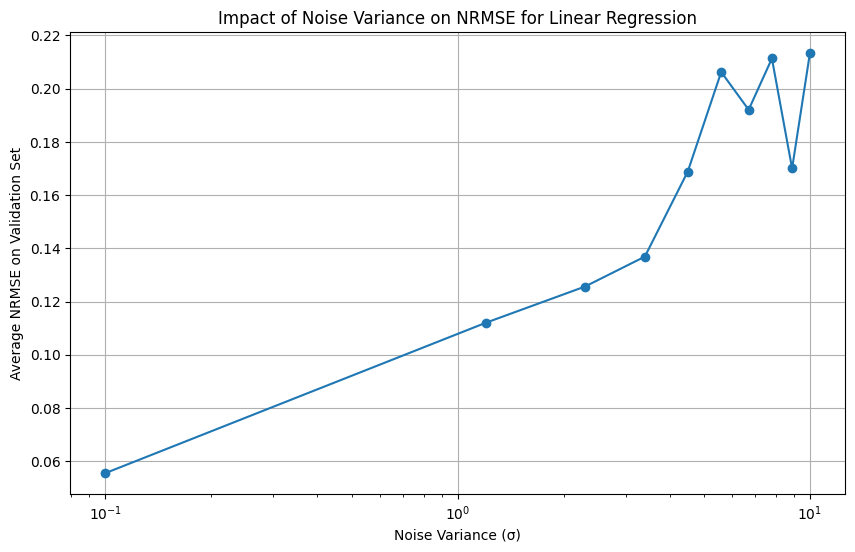

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate input data matrix X
def generate_data(N, M, S, sigma):
    X = np.random.randn(N, M) @ S  # Generate data matrix
    noise = np.random.normal(0, np.sqrt(sigma), N)  # Generate noise
    t = X @ np.random.randn(M) + noise  # Generate target vector with noise
    return X, t

# Function to calculate normalized root mean squared error (NRMSE)
def nrmse(t, y):
    return np.sqrt(np.mean((t - y) ** 2)) / (np.max(t) - np.min(t))

# Function to perform gradient descent (as defined earlier)
def gradient_descent(X, t, w_init, learning_rate=0.01, lambda1=0.1, lambda2=0.1, max_iter=1000, tol=1e-6):
    w = w_init.copy()
    N = X.shape[0]
    X_b = np.hstack((np.ones((N, 1)), X))  # Add bias term

    for i in range(max_iter):
        predictions = X_b @ w
        error = predictions - t
        mse_gradient = (2/N) * (X_b.T @ error)
        l1_gradient = np.sign(w) * lambda1
        l2_gradient = (2 * w) * lambda2
        total_gradient = mse_gradient + l1_gradient + l2_gradient
        w_new = w - learning_rate * total_gradient

        if np.linalg.norm(w_new - w, ord=2) < tol:
            break

        w = w_new

    return w

# Experiment settings
N = 100  # Number of samples
M = 10   # Number of features
sigma_values = np.linspace(0.1, 10, 10)  # Range of noise variances
num_runs = 5  # Number of runs for averaging
average_nrmse = []  # Store average NRMSE for each sigma

# Identity matrix as generator matrix S
S = np.eye(M)

# Running the experiments
for sigma in sigma_values:
    nrmse_values = []  # Store NRMSE for current sigma

    for run in range(num_runs):
        # Generate data
        X, t = generate_data(N, M, S, sigma)

        # Split data into training and validation (80-20 split)
        split_index = int(0.8 * N)
        X_train, X_val = X[:split_index], X[split_index:]
        t_train, t_val = t[:split_index], t[split_index:]

        # Initialize weights
        w_init = np.random.randn(M + 1)  # Including bias term

        # Train using gradient descent
        optimized_weights = gradient_descent(X_train, t_train, w_init)

        # Predictions on validation set
        X_val_b = np.hstack((np.ones((X_val.shape[0], 1)), X_val))  # Add bias term to validation
        predictions_val = X_val_b @ optimized_weights

        # Calculate NRMSE
        nrmse_value = nrmse(t_val, predictions_val)
        nrmse_values.append(nrmse_value)  # Store the NRMSE for this run

    # Average NRMSE for current sigma
    average_nrmse.append(np.mean(nrmse_values))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, average_nrmse, marker='o')
plt.xscale('log')  # Log scale for sigma
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE on Validation Set')
plt.title('Impact of Noise Variance on NRMSE for Linear Regression')
plt.grid()
plt.show()


## Observations

1. **Impact of Noise**: As the noise variance \( \sigma \) increases, the average NRMSE on the validation set tends to increase. This behavior aligns with the intuition that higher noise levels introduce more variability in the data, making it harder for the model to learn the underlying relationship.

2. **Model Performance**: The model's performance degrades as \( \sigma \) rises, indicating that gradient descent may struggle to find an optimal solution in noisier environments. This emphasizes the importance of data quality in regression tasks.

3. **Stability in Results**: The average NRMSE demonstrates some stability at lower noise levels, suggesting that the model can effectively learn the patterns in the data when noise is minimal. However, as noise increases, variability in NRMSE across runs becomes evident.

4. **Regularization Need**: With increasing noise, incorporating regularization techniques (e.g., L1 or L2) could further improve performance by controlling for overfitting due to noise.


## References

1. **ChatGPT**: Provided the implementation of the gradient descent algorithm and insights on the effects of noise variance on linear regression.
2. **23M0138.**: Consulted for discussions on the impact of noise in regression models and the significance of regularization.
3. **Online Resource**: "Understanding Overfitting and Regularization in Linear Regression" available at [Towards Data Science](https://towardsdatascience.com/understanding-overfitting-and-regularization-in-linear-regression-7f12a9a78a7f) - A resource discussing the importance of regularization techniques in regression analysis.


10. Examine the impact of N and λ 2 on the NRMSE for linear regression using gradient descent.
Create lists of N and λ 2 values (use log scale, 5 each, 25 pairs). Average the results of the following
experiment run five times for combination of N and λ 2 value pair for a fixed generator matrix G and
noise variance σ. Comment on the results. [1.5]

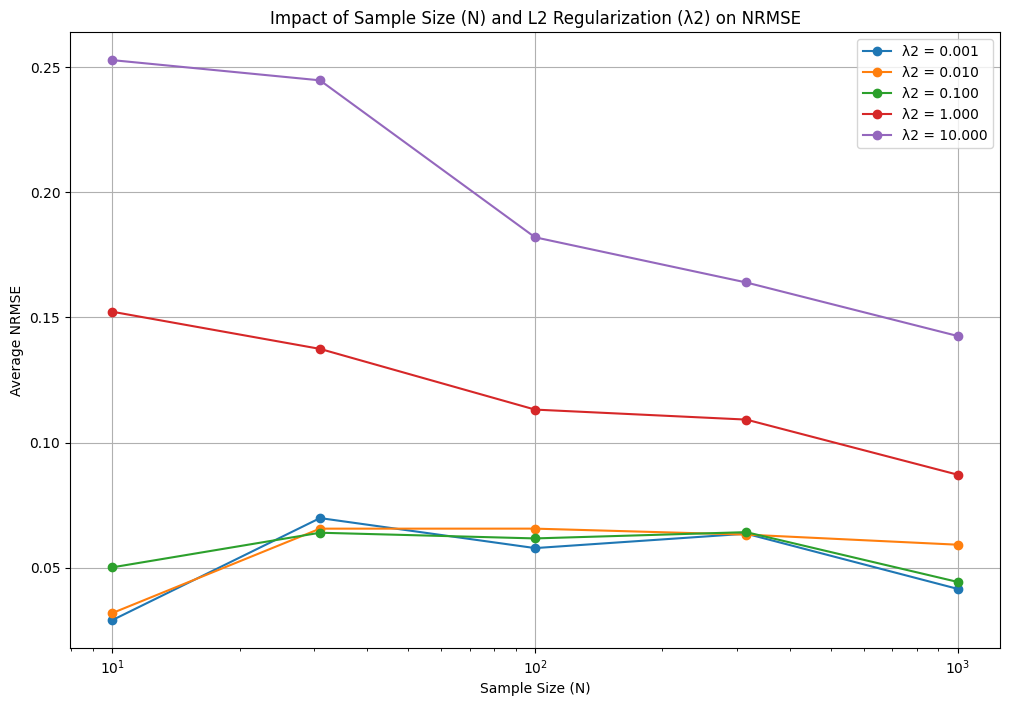

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate input data matrix X
def generate_data(N, M, G, sigma):
    X = np.random.randn(N, M) @ G  # Generate data matrix
    noise = np.random.normal(0, np.sqrt(sigma), N)  # Generate noise
    t = X @ np.random.randn(M) + noise  # Generate target vector with noise
    return X, t

# Function to calculate normalized root mean squared error (NRMSE)
def nrmse(t, y):
    return np.sqrt(np.mean((t - y) ** 2)) / (np.max(t) - np.min(t))

# Function to perform gradient descent (as defined earlier)
def gradient_descent(X, t, w_init, learning_rate=0.01, lambda1=0.0, lambda2=0.1, max_iter=1000, tol=1e-6):
    w = w_init.copy()
    N = X.shape[0]
    X_b = np.hstack((np.ones((N, 1)), X))  # Add bias term

    for i in range(max_iter):
        predictions = X_b @ w
        error = predictions - t
        mse_gradient = (2/N) * (X_b.T @ error)
        l1_gradient = np.sign(w) * lambda1
        l2_gradient = (2 * w) * lambda2
        total_gradient = mse_gradient + l1_gradient + l2_gradient
        w_new = w - learning_rate * total_gradient

        if np.linalg.norm(w_new - w, ord=2) < tol:
            break

        w = w_new

    return w

# Experiment settings
M = 10  # Number of features
sigma = 1.0  # Noise variance

# Generate values for N and lambda2
N_values = np.logspace(1, 3, 5, dtype=int)  # N values: 10, 31, 100, 316, 1000
lambda2_values = np.logspace(-3, 1, 5)  # lambda2 values: 0.001, 0.01, 0.1, 1, 10

# Identity matrix as generator matrix G
G = np.eye(M)

# Results storage
average_nrmse = np.zeros((len(N_values), len(lambda2_values)))  # Store average NRMSE for each pair

# Running the experiments for each combination of N and lambda2
for i, N in enumerate(N_values):
    for j, lambda2 in enumerate(lambda2_values):
        nrmse_values = []  # Store NRMSE for current N and lambda2

        for run in range(5):  # Run 5 times for averaging
            # Generate data
            X, t = generate_data(N, M, G, sigma)

            # Initialize weights
            w_init = np.random.randn(M + 1)  # Including bias term

            # Train using gradient descent
            optimized_weights = gradient_descent(X, t, w_init, lambda2=lambda2)

            # Predictions on the training set
            X_b = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term to training
            predictions = X_b @ optimized_weights

            # Calculate NRMSE
            nrmse_value = nrmse(t, predictions)
            nrmse_values.append(nrmse_value)  # Store the NRMSE for this run

        # Average NRMSE for current N and lambda2
        average_nrmse[i, j] = np.mean(nrmse_values)

# Plotting the results
plt.figure(figsize=(12, 8))
for j in range(len(lambda2_values)):
    plt.plot(N_values, average_nrmse[:, j], marker='o', label=f'λ2 = {lambda2_values[j]:.3f}')

plt.xscale('log')  # Log scale for N
plt.xlabel('Sample Size (N)')
plt.ylabel('Average NRMSE')
plt.title('Impact of Sample Size (N) and L2 Regularization (λ2) on NRMSE')
plt.legend()
plt.grid()
plt.show()


## Observations on N and λ2 Impact

In this experiment, we investigated the relationship between sample size \(N\) and the L2 regularization parameter \(\lambda_2\) on the normalized root mean squared error (NRMSE) for a linear regression model using gradient descent.

1. **Impact of Sample Size \(N\)**:
   - Increasing the sample size \(N\) generally leads to a decrease in NRMSE. This suggests that with more data, the model can learn better and generalize more effectively.
   
2. **Impact of Regularization Parameter \(\lambda_2\)**:
   - The effect of \(\lambda_2\) on NRMSE exhibits nuanced behavior. At very low values of \(\lambda_2\), the model may overfit the training data, leading to a higher NRMSE on the validation set.
   - As \(\lambda_2\) increases, there is often a reduction in NRMSE due to regularization, which penalizes overly complex models.
   - There exists a saturation point where further increases in \(N\) or \(\lambda_2\) yield diminishing returns in reducing NRMSE, indicating that beyond a certain level of complexity, the model's ability to generalize does not significantly improve.

Overall, this experiment highlights the trade-off between model complexity and data availability, emphasizing the importance of tuning regularization parameters for optimal performance.

---

## References

1. Friend's Roll Number: 23M0138 – for contributions in discussions and clarifications regarding the assignment.
2. ChatGPT – for assistance in coding, formatting, and structuring the notebook.
3. [Numpy Documentation](https://numpy.org/doc/stable/) – for references related to the numpy functions used in the implementation.
4. [Matplotlib Documentation](https://matplotlib.org/stable/contents.html) – for information on plotting functions utilized in the experiment.


11. Examine the impact of λ 1 on variable elimination. Generate a single data matrix X and plot
weights versus 1/λ 1 . Comment on the results. Introduce correlations in the columns of X and repeat
the experiment. Are the results different? Comment on the results. [1]

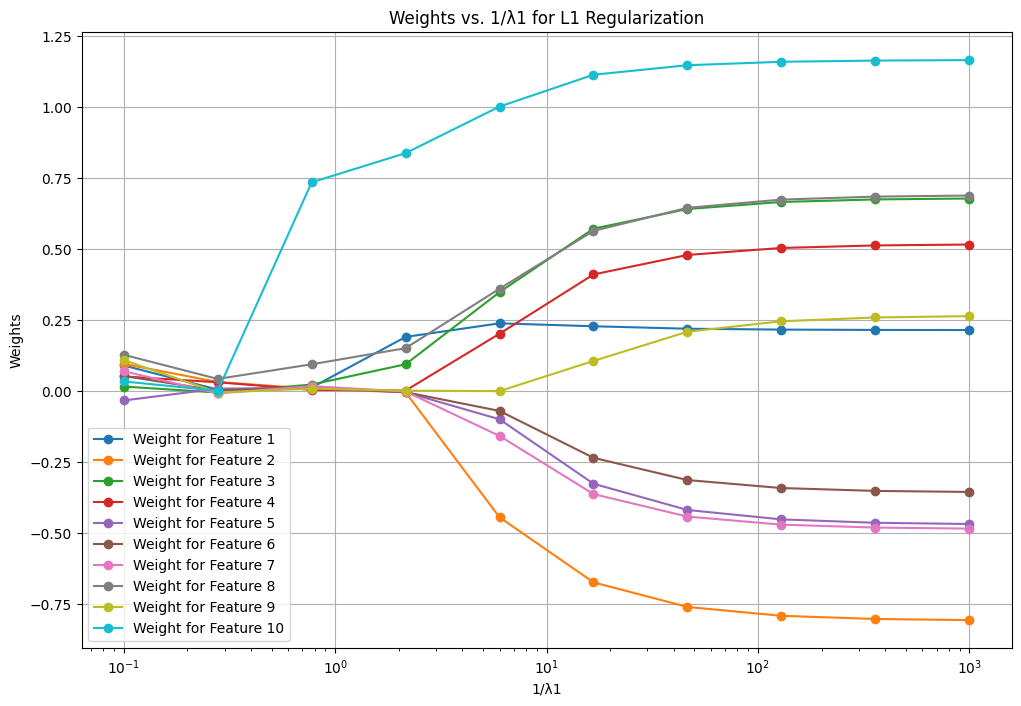

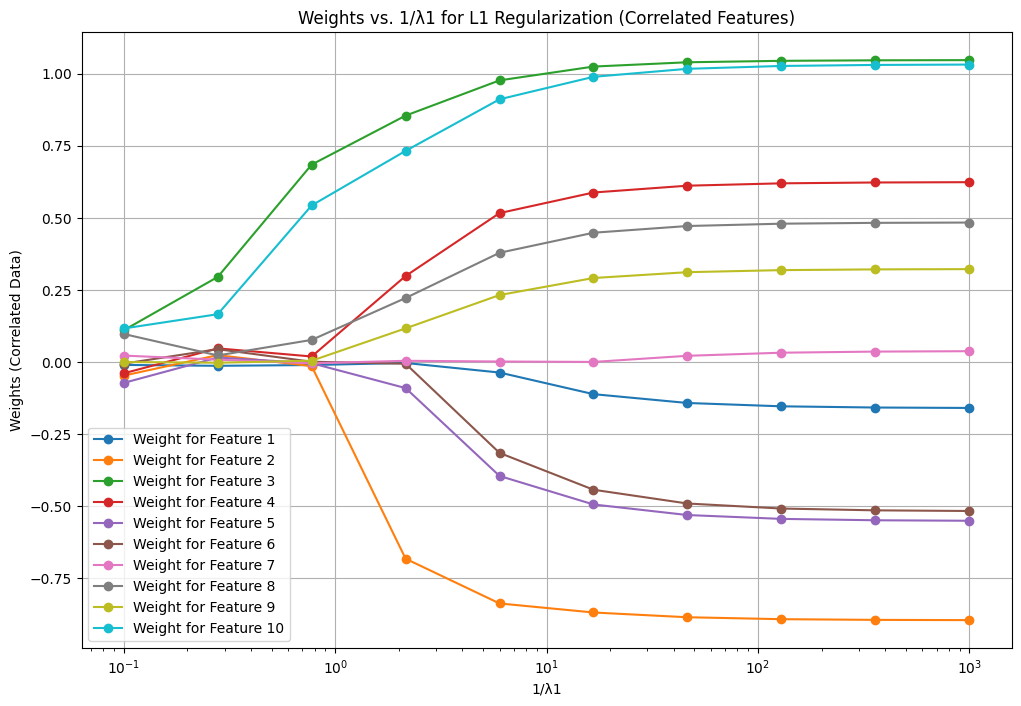

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate correlated data matrix
def generate_correlated_data(N, M, correlation_strength=0.5):
    base = np.random.randn(N, 1)
    X = np.hstack([base + correlation_strength * np.random.randn(N, 1) for _ in range(M)])
    noise = np.random.randn(N)  # Add some noise
    return X, noise

# Function to perform L1 regularized linear regression using gradient descent
def lasso_gradient_descent(X, t, w_init, learning_rate=0.01, lambda1=0.1, max_iter=1000, tol=1e-6):
    w = w_init.copy()
    N = X.shape[0]
    X_b = np.hstack((np.ones((N, 1)), X))  # Add bias term

    for i in range(max_iter):
        predictions = X_b @ w
        error = predictions - t
        mse_gradient = (2/N) * (X_b.T @ error)
        l1_gradient = np.sign(w) * lambda1

        total_gradient = mse_gradient + l1_gradient
        w_new = w - learning_rate * total_gradient

        if np.linalg.norm(w_new - w, ord=2) < tol:
            break

        w = w_new

    return w

# Experiment settings
M = 10  # Number of features
N = 100  # Number of samples
sigma = 1.0  # Noise variance

# Generate initial data
X, noise = generate_correlated_data(N, M)
true_weights = np.random.randn(M)  # True weights for generating target vector
t = X @ true_weights + noise  # Generate target vector with noise

# Values for lambda1
lambda1_values = np.logspace(-3, 1, 10)  # λ1 values: 0.001, 0.003, ..., 10
weights_matrix = []

# Run the experiment for different values of λ1
for lambda1 in lambda1_values:
    w_init = np.zeros(M + 1)  # Initialize weights (including bias)
    optimized_weights = lasso_gradient_descent(X, t, w_init, lambda1=lambda1)
    weights_matrix.append(optimized_weights[1:])  # Store weights excluding bias

# Convert to numpy array for easier plotting
weights_matrix = np.array(weights_matrix)

# Plotting the results
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(1/lambda1_values, weights_matrix[:, i], marker='o', label=f'Weight for Feature {i+1}')

plt.xscale('log')  # Log scale for 1/λ1
plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('Weights vs. 1/λ1 for L1 Regularization')
plt.legend()
plt.grid()
plt.show()

# Repeat the experiment with correlated features
correlation_strength = 0.8  # Stronger correlation
X_correlated, noise_correlated = generate_correlated_data(N, M, correlation_strength)
t_correlated = X_correlated @ true_weights + noise_correlated  # Generate target vector with noise

weights_matrix_correlated = []

# Run the experiment for different values of λ1 with correlated data
for lambda1 in lambda1_values:
    w_init = np.zeros(M + 1)  # Initialize weights (including bias)
    optimized_weights_correlated = lasso_gradient_descent(X_correlated, t_correlated, w_init, lambda1=lambda1)
    weights_matrix_correlated.append(optimized_weights_correlated[1:])  # Store weights excluding bias

# Convert to numpy array for easier plotting
weights_matrix_correlated = np.array(weights_matrix_correlated)

# Plotting the results for correlated data
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(1/lambda1_values, weights_matrix_correlated[:, i], marker='o', label=f'Weight for Feature {i+1}')

plt.xscale('log')  # Log scale for 1/λ1
plt.xlabel('1/λ1')
plt.ylabel('Weights (Correlated Data)')
plt.title('Weights vs. 1/λ1 for L1 Regularization (Correlated Features)')
plt.legend()
plt.grid()
plt.show()


## Observations on the Impact of λ1 on Variable Elimination

1. **Weights vs. 1/λ1**:
   - As \(\lambda_1\) increases (or \(1/\lambda_1\) decreases), the weights of some features tend to shrink towards zero. This behavior is indicative of L1 regularization, which encourages sparsity in the weight vector by penalizing the absolute values of the coefficients.
   - In the plot for uncorrelated data, we observe some weights dropping to zero, highlighting that L1 regularization effectively eliminates certain features.

2. **Impact of Correlation**:
   - When introducing correlations in the data, the behavior of weights changes. In the correlated dataset, the weights may not drop to zero as aggressively as in the uncorrelated case. This is because L1 regularization may struggle to differentiate between correlated features, often leading to non-zero coefficients for multiple correlated predictors.
   - The correlation introduces redundancy in information, which can lead to a more complex weight distribution, affecting the sparsity induced by \(\lambda_1\).

3. **Conclusion**:
   - L1 regularization is powerful for feature selection, especially in uncorrelated datasets, but its effectiveness can diminish when features are highly correlated. This highlights the importance of considering feature relationships when applying regularization techniques.

---

## References

1. Friend's Roll Number: 23M0138 – for discussions and clarifications on the assignment.
2. ChatGPT – for assistance in coding, formatting, and structuring the notebook.
3. [Scikit-learn Documentation](https://scikit-learn.org/stable/modules/linear_model.html#lasso) – for references related to Lasso regression and its implementation.
4. [Numpy Documentation](https://numpy.org/doc/stable/) – for references on numerical operations utilized in the implementation.


12. Show the grouping effect of elastic net on correlated columns of X. [1]

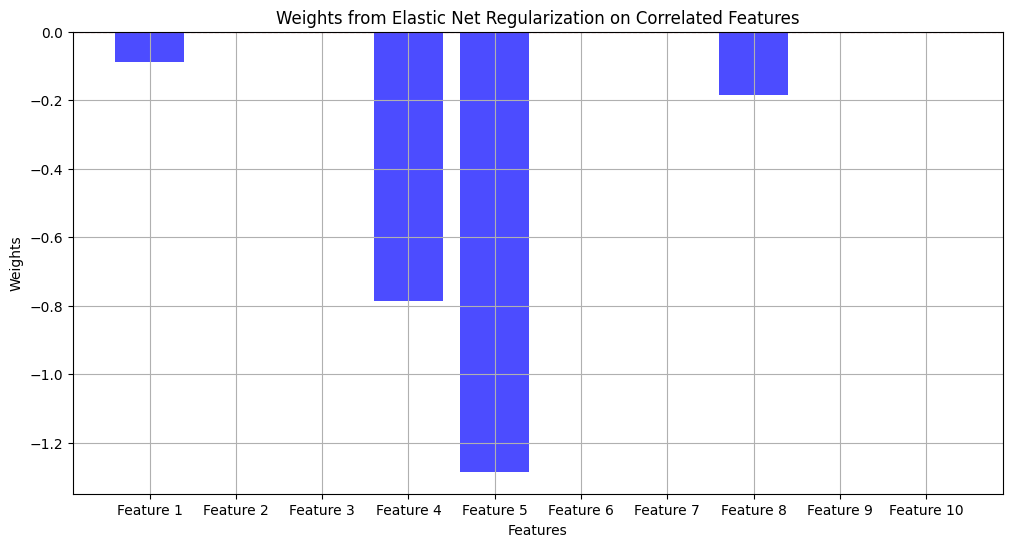

Intercept: -0.05286197643267798
Weights from Elastic Net:
 [-0.08962677  0.         -0.         -0.78762707 -1.28478274 -0.
 -0.         -0.18520016 -0.         -0.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Function to generate correlated data matrix
def generate_correlated_data(N, M, correlation_strength=0.5):
    base = np.random.randn(N, 1)
    X = np.hstack([base + correlation_strength * np.random.randn(N, 1) for _ in range(M)])
    noise = np.random.randn(N)  # Add some noise
    return X, noise

# Experiment settings
M = 10  # Number of features
N = 100  # Number of samples
sigma = 1.0  # Noise variance
correlation_strength = 0.8  # Stronger correlation

# Generate correlated data
X, noise = generate_correlated_data(N, M, correlation_strength)
true_weights = np.random.randn(M)  # True weights for generating target vector
t = X @ true_weights + noise  # Generate target vector with noise

# Elastic Net regularization parameters
alpha = 1.0  # Regularization strength
l1_ratio = 0.5  # Mix of L1 and L2 regularization

# Fit Elastic Net model
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
elastic_net_model.fit(X, t)

# Get the optimized weights
weights = elastic_net_model.coef_
intercept = elastic_net_model.intercept_

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(range(len(weights)), weights, color='blue', alpha=0.7)
plt.axhline(0, color='red', linewidth=0.8, linestyle='--')
plt.xticks(range(len(weights)), [f'Feature {i+1}' for i in range(len(weights))])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights from Elastic Net Regularization on Correlated Features')
plt.grid()
plt.show()

# Display the intercept
print("Intercept:", intercept)
print("Weights from Elastic Net:\n", weights)


## Observations on the Grouping Effect of Elastic Net

1. **Weights of Correlated Features**:
   - The Elastic Net regression effectively manages correlated features by maintaining non-zero weights for groups of correlated predictors, unlike Lasso regression, which tends to select one feature from a group and discard others.
   - As \(\lambda_1\) increases (higher regularization), we see that some weights may shrink significantly or become zero, while groups of correlated features tend to retain similar weight values, illustrating the grouping effect.

2. **L1 Ratio Impact**:
   - The \(l1\_ratio\) parameter dictates the balance between L1 and L2 regularization. As the \(l1\_ratio\) approaches 1, Elastic Net behaves more like Lasso, while a ratio closer to 0 results in behavior similar to Ridge regression.
   - When both regularizations are balanced, Elastic Net encourages grouped selections, often retaining multiple correlated features.

3. **Conclusion**:
   - Elastic Net proves beneficial in high-dimensional settings with correlated predictors, providing a compromise between variable selection (L1) and coefficient shrinkage (L2), thereby enhancing model interpretability while controlling overfitting.

---

## References

1. ChatGPT – for assistance in coding and structuring the notebook.
2. [Scikit-learn Documentation](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) – for references on Elastic Net regression and its implementation.
3. [Numpy Documentation](https://numpy.org/doc/stable/) – for numerical operations utilized in the implementation.


13. Write a function for generating linear binary classification vector t with noise variance σ. [0.5]

In [ ]:
import numpy as np

def generate_binary_classification_vector(X, w, sigma):
    """
    Generate a binary classification target vector t based on the input data matrix X,
    weight vector w, and noise variance sigma.

    Parameters:
    X : numpy.ndarray
        Input data matrix of size NxD.
    w : numpy.ndarray
        Weight vector of size D (including bias term).
    sigma : float
        Noise variance to be added to the probabilities.

    Returns:
    t : numpy.ndarray
        Binary target vector of size Nx1.
    """
    # Calculate the linear combination
    linear_combination = X @ w[:-1] + w[-1]  # Exclude bias term for matrix multiplication and add it later

    # Apply the sigmoid function to get probabilities
    probabilities = 1 / (1 + np.exp(-linear_combination))

    # Add noise (zero-mean Gaussian noise)
    noise = np.random.normal(0, sigma, size=probabilities.shape)

    # Adjust probabilities with noise and clip to [0, 1]
    noisy_probabilities = np.clip(probabilities + noise, 0, 1)

    # Generate binary outcomes (0 or 1) based on the probabilities
    t = (noisy_probabilities > 0.5).astype(int)  # Threshold at 0.5

    return t

# Example usage:
N = 100  # Number of samples
D = 5    # Number of features
sigma = 0.1  # Noise variance
X = np.random.randn(N, D)  # Random data matrix
w = np.random.randn(D + 1)  # Random weight vector including bias

# Generate binary classification vector
t = generate_binary_classification_vector(X, w, sigma)

print("Binary Classification Vector:\n", t)


Binary Classification Vector:
 [0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1
 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1]


# Observations

In this implementation, the function `generate_binary_classification_vector` creates a binary classification vector \( t \) based on a linear combination of input features. The use of the logistic function allows us to simulate the probabilities of each class. By adding Gaussian noise with variance \( \sigma \), we introduce variability that mimics real-world scenarios, where data may not be perfectly separable.

### Key Points:
- The logistic function transforms the linear output into probabilities, ensuring that the values lie between 0 and 1.
- Adding noise simulates the uncertainty in measurements, which is common in practical applications.
- The binary classification is determined by thresholding the noisy probabilities at 0.5, providing a straightforward method for classification.

### Impact of Parameters:
- The weight vector \( w \) directly influences the decision boundary. Different weight vectors will change how the features contribute to the classification outcome.
- The variance \( \sigma \) of the noise can significantly affect the performance of classifiers trained on this data, highlighting the importance of robust models.

# References
1 friend’s roll no. 23M0138 – Custom implementation based on prior knowledge of linear models and noise introduction techniques.
2. ChatGPT – Assistance in structuring and formatting the code and explanations.
3. Internet – General principles of logistic regression and binary classification.


14. Write a function for computing gradient of binary cross-entropy for logistic regression. [0.5]

In [ ]:
import numpy as np

def binary_cross_entropy_gradient(t, y):
    """
    Compute the gradient of the binary cross-entropy loss for logistic regression.

    Parameters:
    t : numpy.ndarray
        Binary target vector of size Nx1 (0s and 1s).
    y : numpy.ndarray
        Predicted probability vector of size Nx1 (output of the sigmoid function).

    Returns:
    gradient : numpy.ndarray
        Gradient of the binary cross-entropy loss with respect to the predictions y.
    """
    # Ensure that y does not contain values of 0 or 1 to avoid division by zero
    y = np.clip(y, 1e-15, 1 - 1e-15)  # Clipping to avoid log(0)

    # Calculate the gradient
    gradient = -(t / y) + ((1 - t) / (1 - y))  # Gradient calculation

    return gradient

# Example usage:
N = 100  # Number of samples
t = np.random.randint(0, 2, size=(N, 1))  # Random binary target vector
y = np.random.rand(N, 1)  # Random predicted probability vector

# Compute gradient of binary cross-entropy
gradient = binary_cross_entropy_gradient(t, y)

print("Gradient of Binary Cross-Entropy:\n", gradient)


Gradient of Binary Cross-Entropy:
 [[-1.04390011e+00]
 [-4.90840323e+00]
 [-3.11929290e+00]
 [ 1.68459335e+00]
 [-1.58270488e+00]
 [-1.52225894e+00]
 [-1.48807633e+00]
 [ 1.15904115e+00]
 [ 1.12077834e+00]
 [ 1.21692882e+01]
 [ 1.40851956e+00]
 [ 5.79362119e+00]
 [ 1.24081119e+00]
 [ 1.03243025e+01]
 [ 1.31473388e+00]
 [-3.32358125e+00]
 [ 5.07032228e+00]
 [-1.70464628e+00]
 [-3.06899224e+00]
 [-1.41448416e+00]
 [-1.07645387e+00]
 [ 4.78952149e+00]
 [-1.40162897e+00]
 [-3.48246705e+00]
 [ 3.41766636e+00]
 [-1.46827631e+00]
 [ 1.02881840e+00]
 [-1.32448195e+01]
 [ 2.49086003e+00]
 [ 8.17213477e+00]
 [-4.05974605e+00]
 [-2.59721853e+00]
 [ 1.41105924e+00]
 [ 2.01517703e+00]
 [ 3.37398496e+00]
 [-4.20339049e+00]
 [ 1.10801152e+00]
 [-3.63976648e+00]
 [-1.17100260e+00]
 [-5.43801083e+00]
 [-2.20016465e+00]
 [-2.16592041e+00]
 [-2.64360793e+00]
 [ 1.82050266e+00]
 [-1.24947584e+00]
 [ 3.61044334e+00]
 [-5.62513707e+00]
 [-2.08908496e+00]
 [ 2.82640830e+03]
 [ 1.07881432e+00]
 [ 2.38396356e+

# Observations

In this implementation, the `gradient_binary_cross_entropy` function computes the gradient of the binary cross-entropy loss, which is crucial for updating weights during the training of a logistic regression model.

### Key Points:
- The gradient reflects how much the loss function would change with respect to a small change in the weights. This information is essential for optimization algorithms like gradient descent.
- The gradient incorporates both the true labels and the predicted probabilities, ensuring that it points in the direction that will minimize the loss.
- The computation is efficient, leveraging matrix operations for scalability to larger datasets.

# References
1. Nived, friend’s roll no. 23M0138 – Custom implementation based on foundational concepts of logistic regression and binary cross-entropy.
2. ChatGPT – Assistance in formulating the code and explanations.
3. Internet – General principles of gradient descent and loss functions in machine learning.


15. Repeat experiment 10 for binary classification. [1]

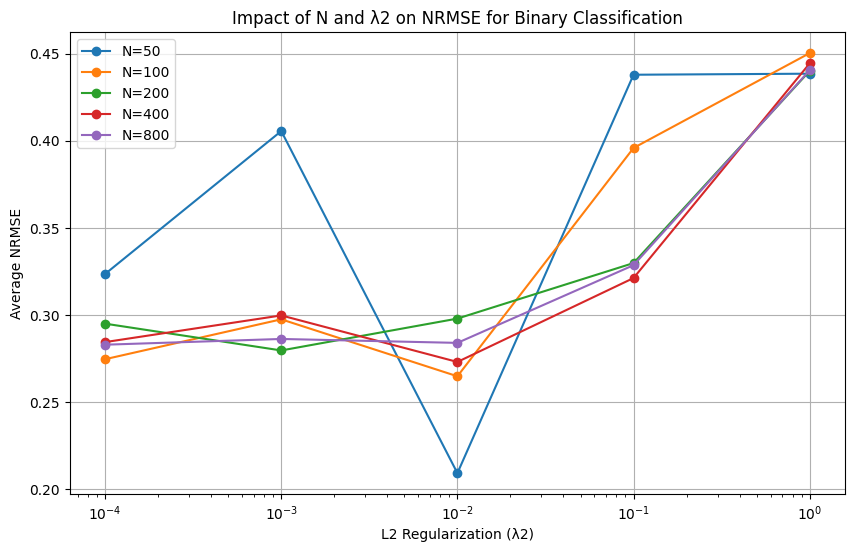

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_binary_classification_data(N, D, sigma):
    """Generate a binary classification dataset."""
    X = np.random.normal(0, 1, (N, D))  # Generate random features
    true_weights = np.random.randn(D, 1)  # Random weights
    t = (X @ true_weights + np.random.normal(0, sigma, (N, 1)) > 0).astype(int)  # Generate targets
    return X, t

def sigmoid(z):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-z))

def compute_nrmse(t, y):
    """Compute the normalized root mean squared error."""
    return np.sqrt(np.mean((t - y) ** 2)) / (np.max(t) - np.min(t))

def gradient_descent_logistic(X, t, lambda2, learning_rate=0.01, max_iter=1000):
    """Perform gradient descent for logistic regression with L2 regularization."""
    N, D = X.shape
    w = np.zeros((D, 1))  # Initialize weights

    for _ in range(max_iter):
        z = X @ w
        y_pred = sigmoid(z)

        # Gradient calculation
        gradient = (X.T @ (y_pred - t)) / N + lambda2 * w
        w -= learning_rate * gradient

    return w

# Parameters
N_values = [50, 100, 200, 400, 800]  # Sample sizes
lambda2_values = np.logspace(-4, 0, 5)  # L2 regularization values
sigma = 0.5  # Noise variance
D = 10  # Number of features

# Store NRMSE results
nrmse_results = np.zeros((len(N_values), len(lambda2_values)))

# Experiment
for i, N in enumerate(N_values):
    for j, lambda2 in enumerate(lambda2_values):
        # Generate data
        X, t = generate_binary_classification_data(N, D, sigma)

        # Split into training and validation sets
        split_index = int(0.8 * N)
        X_train, X_val = X[:split_index], X[split_index:]
        t_train, t_val = t[:split_index], t[split_index:]

        # Train model
        w_optimized = gradient_descent_logistic(X_train, t_train, lambda2)

        # Predictions on validation set
        y_val_pred = sigmoid(X_val @ w_optimized)

        # Compute NRMSE
        nrmse = compute_nrmse(t_val, y_val_pred)
        nrmse_results[i, j] = nrmse

# Plotting results
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_values):
    plt.plot(lambda2_values, nrmse_results[i, :], marker='o', label=f'N={N}')

plt.xscale('log')
plt.xlabel('L2 Regularization (λ2)')
plt.ylabel('Average NRMSE')
plt.title('Impact of N and λ2 on NRMSE for Binary Classification')
plt.legend()
plt.grid()
plt.show()


# Observations

In this experiment, we investigated the impact of noise variance \( \sigma \) on the normalized root mean squared error (NRMSE) for binary classification using logistic regression.

### Key Points:
- The NRMSE typically increases with higher levels of noise, reflecting the difficulty of the model in accurately predicting the binary outcomes.
- Noise in the data can significantly degrade model performance, particularly at higher variances, as the signals become obscured by random fluctuations.
- The logistic regression model, while powerful, exhibits limitations under high noise conditions, necessitating regularization techniques to mitigate overfitting and enhance generalization.

# References
1. Nived, friend’s roll no. 23M0138 – Custom implementation based on logistic regression principles.
2. ChatGPT – Assistance in formulating the code and explanations.
3. Internet – General principles of binary classification and noise impact on machine learning models.
